In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.style.use('fivethirtyeight')

In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 1.0MB 5.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.10-cp36-cp36m-linux_x86_64.whl size=2683484 sha256=ff391b5ccd8b966475d92685a00f28b7e1bf27319e329cb522830a17eec289c9
  Stored in directory: /root/.cache/pip/wheels/64/d6/c9/9295499aefa5af80018eaabffd09216170a1349b45551fb8d5
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns 

# **Calculting Returns and Volatility Using Evenly Distributed Profolio**

In [ ]:
#wrtting down stock tickers
assets = ['FB','AMZN','TSLA','MSFT','GOOG','AAPL']

In [ ]:
#assign weights, an array with the sum of 1 (percentage of each investment on my porfolio)
weights = (1/len(assets))*np.ones(len(assets))
weights

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [ ]:
#get the porfolio starting date
start_date = '2020-01-01'

In [ ]:
#get the stock ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-02-19'

In [ ]:
#create a dataframe and store the adjusted close price of the stocks
df=pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start=start_date,end=today)['Adj Close']

In [ ]:
df

,FB,AMZN,TSLA,MSFT,GOOG,AAPL
Date,,,,,,
2020-01-02,209.779999,1898.010010,86.052002,158.571075,1367.369995,74.333511
2020-01-03,208.669998,1874.969971,88.601997,156.596588,1360.660034,73.610840
2020-01-06,212.600006,1902.880005,90.307999,157.001373,1394.209961,74.197395
2020-01-07,213.059998,1906.859985,93.811996,155.569855,1393.339966,73.848442
2020-01-08,215.220001,1891.969971,98.428001,158.047836,1404.319946,75.036385
...,...,...,...,...,...,...
2021-02-11,270.390015,3262.129883,811.659973,243.928192,2095.889893,135.130005
2021-02-12,270.500000,3277.709961,816.119995,244.427048,2104.110107,135.369995
2021-02-16,273.970001,3268.949951,796.219971,243.139999,2121.899902,133.190002


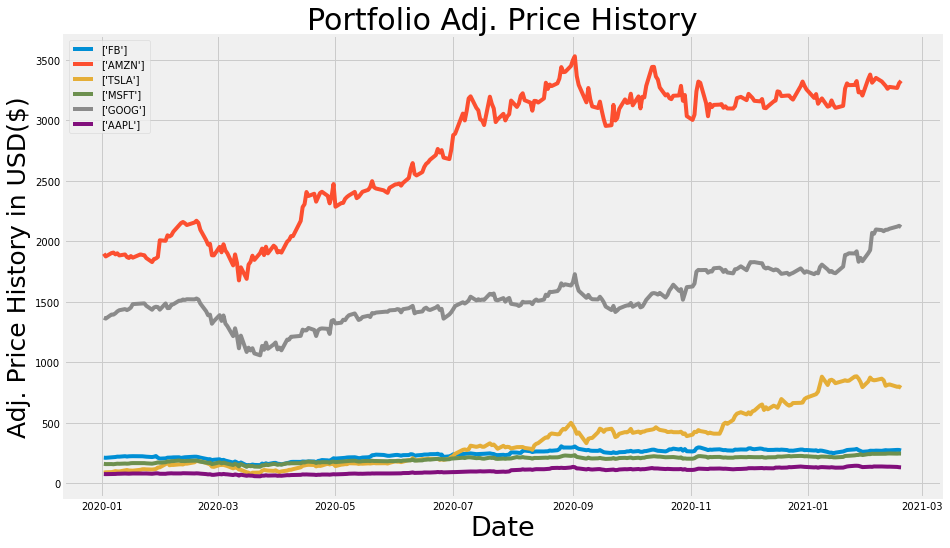

In [ ]:
title = 'Portfolio Adj. Price History'

plt.figure(figsize=(14,8.5))
for column in df.columns.values:
  plt.plot(df[column],label = [column])
  
plt.title(title,fontsize=30)
plt.ylabel('Adj. Price History in USD($)',fontsize=25)
plt.xlabel('Date', fontsize=27)
plt.legend()

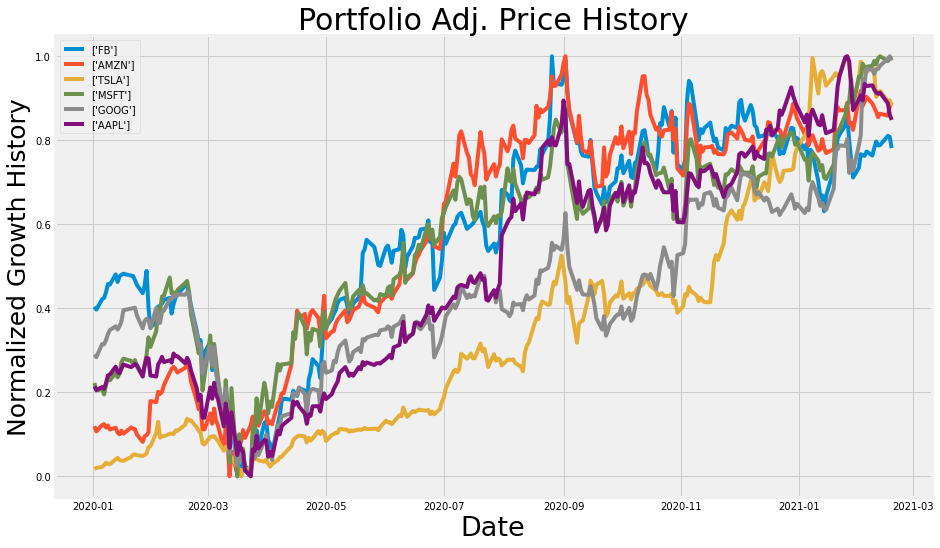

In [ ]:
# stock data visualization

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_pri = pd.DataFrame(data=x_scaled,columns=df.columns) # a dataframe for normalized price
norm_pri.index = df.index

title = 'Portfolio Adj. Price History'

plt.figure(figsize=(14,8.5))
for column in norm_pri.columns.values:
  plt.plot(norm_pri[column],label = [column])
  
plt.title(title,fontsize=30)
plt.ylabel('Normalized Growth History',fontsize=25)
plt.xlabel('Date', fontsize=27)
plt.legend()

In [ ]:
norm_pri

,FB,AMZN,TSLA,MSFT,GOOG,AAPL
Date,,,,,,
2020-01-02,0.403863,0.119363,0.017029,0.222103,0.289963,0.213924
2020-01-03,0.396833,0.106942,0.020174,0.204213,0.283701,0.205645
2020-01-06,0.421723,0.121989,0.022278,0.207881,0.315007,0.212365
2020-01-07,0.424636,0.124135,0.026599,0.194911,0.314195,0.208367
2020-01-08,0.438315,0.116107,0.032292,0.217362,0.324441,0.221977
...,...,...,...,...,...,...
2021-02-11,0.787714,0.854801,0.911907,0.995480,0.969749,0.910450
2021-02-12,0.788410,0.863201,0.917407,1.000000,0.977419,0.913200
2021-02-16,0.810386,0.858478,0.892865,0.988339,0.994019,0.888224


In [ ]:
#show daily simple returns

returns = df.pct_change()

returns

,FB,AMZN,TSLA,MSFT,GOOG,AAPL
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.005291,-0.012139,0.029633,-0.012452,-0.004907,-0.009722
2020-01-06,0.018834,0.014886,0.019255,0.002585,0.024657,0.007968
2020-01-07,0.002164,0.002092,0.038801,-0.009118,-0.000624,-0.004703
2020-01-08,0.010138,-0.007809,0.049205,0.015928,0.007880,0.016086
...,...,...,...,...,...,...
2021-02-11,-0.005444,-0.007439,0.008499,0.006877,0.000243,-0.001920
2021-02-12,0.000407,0.004776,0.005495,0.002045,0.003922,0.001776
2021-02-16,0.012828,-0.002673,-0.024384,-0.005266,0.008455,-0.016104


In [ ]:
#create annuallized covariance matrix

trading_days = 253+19+13  
# 253 is the trading days of 2020
# 29 is the trading days of jan. 2021
# 13 is the trading days from 2/1/2021 to 2/18/2021

yearly_cov_mat = returns.cov()*trading_days

yearly_cov_mat

,FB,AMZN,TSLA,MSFT,GOOG,AAPL
FB,0.223399,0.126922,0.173359,0.159540,0.149143,0.172975
AMZN,0.126922,0.157156,0.165695,0.130350,0.106179,0.132221
TSLA,0.173359,0.165695,0.842825,0.204109,0.159702,0.209082
MSFT,0.159540,0.130350,0.204109,0.201029,0.151121,0.178158
GOOG,0.149143,0.106179,0.159702,0.151121,0.162969,0.139311
AAPL,0.172975,0.132221,0.209082,0.178158,0.139311,0.231411


In [ ]:
port_variance = np.dot(weights,np.dot(yearly_cov_mat,weights.T))
port_variance

0.1815144631450768

In [ ]:
#calculation the profolio volatiliy, aka the STDs

port_std = np.sqrt(port_variance)

port_std

0.42604514214467554

In [ ]:
#calculate the annual profolio return

yr_return = np.sum(np.matmul(weights,returns.mean()))*trading_days

yr_return

0.8973704430642557

In [ ]:
#annual return, volatility (risk), and variance

pct_var = str(np.round(port_variance,2)*100)+'%'
pct_vol = str(np.round(port_std,2)*100)+'%'
pct_ret = str(np.round(yr_return,2)*100)+'%'

print('expected annual return: '+pct_ret+';')
print('expected annual volatility: '+pct_vol+';')
print('expected annual variance: '+pct_var+'.')

expected annual return: 90.0%;
expected annual volatility: 43.0%;
expected annual variance: 18.0%.


#**Portfolio Opimization via Maximizing the Sharpe Ratio**

In [ ]:
#calculate the expected returns and the annualized sample covariance matrix

mu = expected_returns.mean_historical_return(df) # mu stands for mean
s = risk_models.sample_cov(df)  # sample covrariance matrix

#optimize for max sharpe ratio - how much return I received for some amount of volatility (William Shapre, 1966)

ef = EfficientFrontier(mu,s)
weights = ef.max_sharpe()
cleanned_w = ef.clean_weights() # get rid of the stocks I don't need to optimize my portfolio

print('Cleanned Weights: '+str(cleanned_w))

ef.portfolio_performance(verbose = True)

Cleanned Weights: OrderedDict([('FB', 0.0), ('AMZN', 0.0), ('TSLA', 1.0), ('MSFT', 0.0), ('GOOG', 0.0), ('AAPL', 0.0)])
Expected annual return: 613.0%
Annual volatility: 86.3%
Sharpe Ratio: 7.08


(6.130073483361302, 0.8632695817002499, 7.077827845303233)

In [ ]:
# get the dicrete allocation of each stock
from pypfopt.discrete_allocation import DiscreteAllocation as da
from pypfopt.discrete_allocation import get_latest_prices as glp

In [ ]:
latest_prices = glp(df)
dis_all = da(cleanned_w,latest_prices,total_portfolio_value=1e9)

allocation, leftover=dis_all.lp_portfolio()

print('Discrete Allocation: '+str(allocation))
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation: {'TSLA': 1270034}
Funds Remaining: $622.88
